In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Adjusting the classification threshold

- [Precision/Recall Trade-off](#Precision/Recall-Trade-off)
- [ROC curve and AUC score](#ROC-curve-and-AUC-score)

In [4]:
# load the pima indian dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(url)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
# define X and y
X = pima.drop('label',axis=1)
y = pima.label

# train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y)

# instantiate the logistic regression classifier
logreg_clf = LogisticRegression(max_iter=1000)

# train the model
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Let's look at how the classifier makes its prediction. 
For each patient, logistic regression computes the probability of that patient having diabetes

In [7]:
# first column is the probability of label=0, second column is the probability of label=1
logreg_clf.predict_proba(X_test)

array([[0.36020763, 0.63979237],
       [0.1007608 , 0.8992392 ],
       [0.83079136, 0.16920864],
       [0.62100838, 0.37899162],
       [0.91443556, 0.08556444],
       [0.84632913, 0.15367087],
       [0.24287448, 0.75712552],
       [0.9767417 , 0.0232583 ],
       [0.832202  , 0.167798  ],
       [0.03917581, 0.96082419],
       [0.65812616, 0.34187384],
       [0.78628856, 0.21371144],
       [0.82870542, 0.17129458],
       [0.14543672, 0.85456328],
       [0.70826789, 0.29173211],
       [0.64579923, 0.35420077],
       [0.43021345, 0.56978655],
       [0.29363277, 0.70636723],
       [0.80371818, 0.19628182],
       [0.77443321, 0.22556679],
       [0.88277169, 0.11722831],
       [0.0989589 , 0.9010411 ],
       [0.67079226, 0.32920774],
       [0.72509176, 0.27490824],
       [0.12238974, 0.87761026],
       [0.76042963, 0.23957037],
       [0.89910449, 0.10089551],
       [0.81256275, 0.18743725],
       [0.54529485, 0.45470515],
       [0.62554336, 0.37445664],
       [0.

In [8]:
# probability of label = 1 (diabetes)
proba = logreg_clf.predict_proba(X_test)[:,1]
proba

array([0.63979237, 0.8992392 , 0.16920864, 0.37899162, 0.08556444,
       0.15367087, 0.75712552, 0.0232583 , 0.167798  , 0.96082419,
       0.34187384, 0.21371144, 0.17129458, 0.85456328, 0.29173211,
       0.35420077, 0.56978655, 0.70636723, 0.19628182, 0.22556679,
       0.11722831, 0.9010411 , 0.32920774, 0.27490824, 0.87761026,
       0.23957037, 0.10089551, 0.18743725, 0.45470515, 0.37445664,
       0.19269731, 0.14911758, 0.64680647, 0.06677539, 0.12106157,
       0.07003299, 0.17074108, 0.73542211, 0.03000763, 0.10986556,
       0.18516567, 0.70957682, 0.03156067, 0.10083418, 0.31204349,
       0.36951385, 0.90157288, 0.70849232, 0.23907153, 0.26973786,
       0.3153543 , 0.75129435, 0.23236081, 0.37243763, 0.19437568,
       0.47044499, 0.64170412, 0.0341592 , 0.37914449, 0.09258565,
       0.07195651, 0.14358368, 0.12114114, 0.03820191, 0.28284598,
       0.28182386, 0.06909769, 0.85341014, 0.13804533, 0.19347228,
       0.78767771, 0.32689465, 0.65285252, 0.11387009, 0.89834

Scikit-learn does not let you set the threshold directly.
Scikit-learn models predict label=1 if the probability is larger than 0.5, otherwise they predicts label = 0.

In [9]:
# sklearn predictions uses threshold = 0.5
y_test_pred = logreg_clf.predict(X_test)
y_test_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [10]:
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.78125
0.5942028985507246
0.7454545454545455


In [15]:
# predictions with a different threshold
threshold = 0.3 # set new threshold
y_test_pred = np.zeros(len(y_test)) # vector of all zeros
y_test_pred[proba > threshold]=1 # set entry to 1 if probability is larger than the threshold
y_test_pred

array([1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0.])

In [16]:
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.7604166666666666
0.782608695652174
0.6352941176470588


We can loop over different thresholds and check which one gives the best evaluation metric (accuracy, recall, precision, etc).

In [17]:
# create an array with different thresholds 
thresholds = np.linspace(0,1,100) # 100 evenly spaced points on [0,1]
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [18]:
accuracies = []
recalls = []
precisions = []
# loop over thresholds list
for threshold in thresholds:
    y_test_pred = np.zeros(len(y_test)) # vector of all zeros
    y_test_pred[proba > threshold]=1
    # accuracy
    accuracies.append(accuracy_score(y_test,y_test_pred))
    # recall
    recalls.append(recall_score(y_test,y_test_pred))
    # precision
    precisions.append(precision_score(y_test,y_test_pred))

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


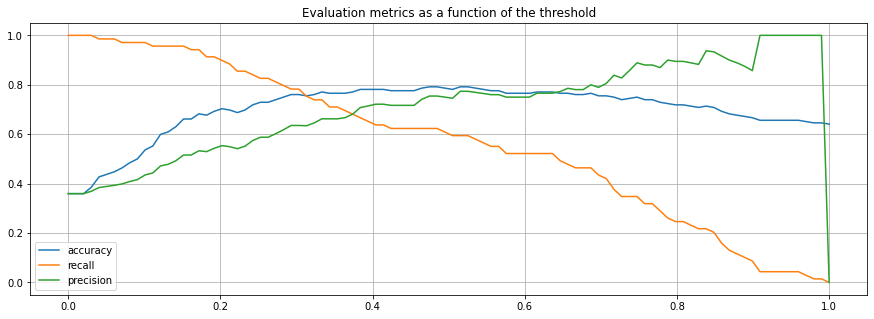

In [19]:
fig, axes = plt.subplots(figsize=(15,5))

axes.plot(thresholds,accuracies,label='accuracy')
axes.plot(thresholds,recalls,label='recall')
axes.plot(thresholds,precisions,label='precision')

axes.grid(True)
axes.set_title('Evaluation metrics as a function of the threshold')
axes.legend()


## Precision/Recall Trade-off

Text(0, 0.5, 'precision')

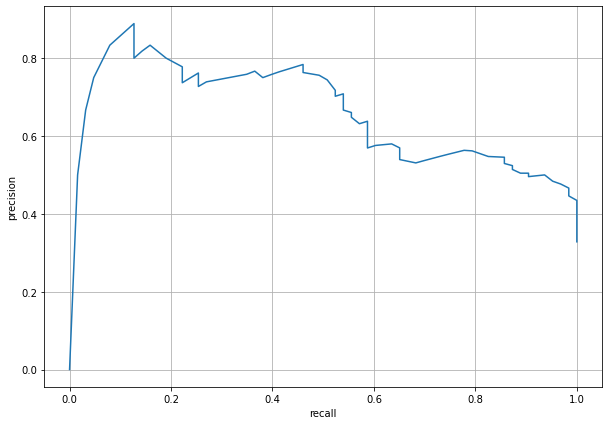

In [29]:
# precision vs recall curve
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(recalls,precisions)
ax.grid(True)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

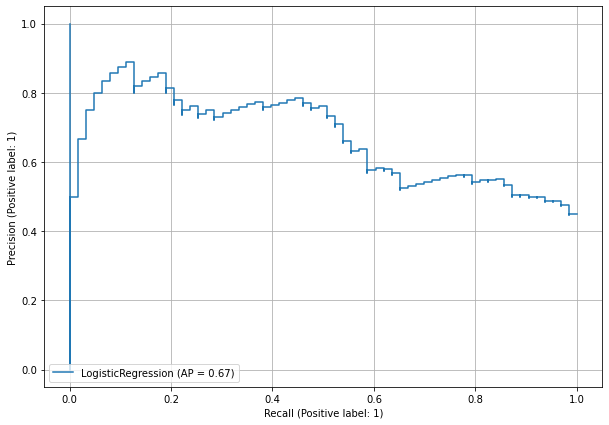

In [30]:
# to plot the precision-recall curve, you should use PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(10,7))
PrecisionRecallDisplay.from_estimator(logreg_clf,X_test,y_test,ax=ax)
ax.grid(True)

AP refers to "average precision", which is the area under the precision-recall curve

In [34]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test,proba)

0.6668335519944276

## ROC curve and AUC score

ROC stands for "receiver operating characteristic" (it was initially designed for evaluating the strength of radar detectors during WW2).
ROC shows how well a model can separate two classes.

The ROC curve is based on two quantities:

- False positive rate (FPR): the fraction of false positives among all negative examples
- True positive rate (TPR): the fraction of true positives among all positive examples.

Like precision and recall, these values are based on the confusion matrix.

\begin{align*}
&\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}} \\
&\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
\end{align*}

To create a ROC curve, we plot FPR and TPR against each other.

In [31]:
from sklearn.metrics import RocCurveDisplay

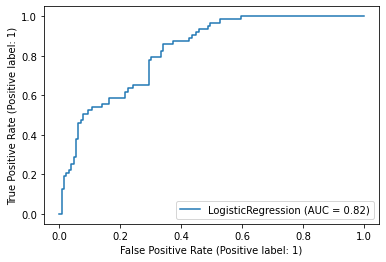

In [32]:
RocCurveDisplay.from_estimator(logreg_clf,X_test,y_test)

AUC refers to "area under the curve". It measures the area under the TPR-FPR curve.

If all we need is the AUC, we don't need to compute the ROC curve first. 
We can take a shortcut and use the `roc_auc_score` function from Scikit-learn.

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,proba)

0.8249046388581271

| AUC | Model performance |
| - | - |
| 0.5 | random |
| 0.6 | poor |
| 0.7 | weak |
| 0.8 | decent |
| 0.9 | good |
| 1.0 | perfect |